# REIT Stocks (Real Estate Investment Trust) Statistical analyis

REITS are an alternative investment option to those that want to invest in real estate, but do not have the funds to buy property or simply do not qualify for mortgage. Reits historically have delivered competitive high returns based on long term capital appreciation. This analysis will use hvplots visualizations to plot the top 15 REITS by market CAP, calculate rolling statistics, betas and compare them to the trends of S&P 500 market Cap index over time. 

### Prepare Data for visualization

In [3]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

# Import hvplot
import hvplot.pandas

# Set the path
file_path = Path('../../Resources/REITmarketcap.csv')

# Read in the CSV as a DataFrame
REIT_csv = pd.read_csv(file_path)

#Grab the symbol, volue and price per earning ratio
Volume_PE = REIT_csv.loc[:, ['Symbol','Volume', 'PE Ratio (TTM)']]

#Set the Symbol as index
Volume_PE.set_index(Volume_PE["Symbol"], inplace=True)

#Drop the extra symbol column
Volume_PE.drop(columns=["Symbol"], inplace=True)

# Grab the `Symbol` and `Market Cap` columns
market_cap = REIT_csv.loc[:, ['Symbol', 'Market Cap']]

# Set the 'Symbol' as the index
market_cap.set_index(market_cap['Symbol'], inplace=True)

# Drop the extra 'Symbol' column
market_cap.drop(columns=['Symbol'], inplace=True)

# Filter down to 15 companies with the largest market caps
top_15_market_cap = market_cap.nlargest(15,'Market Cap')




In [4]:
REIT_csv.head()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,AMT,American Tower Corporation (REIT),250.73,-0.57,-0.23%,"916,134",1.833M,111.217,58.19,NaN
1,PLD,"Prologis, Inc.",102.64,-0.24,-0.23%,2.071,3.302M,75.827,40.38,NaN
2,CCI,Crown Castle International Corp. (REIT),164.36,-0.84,-0.51%,1.22,2.222M,68.977,94.57,NaN
3,EQIX,"Equinix, Inc. (REIT)",770.12,-2.87,-0.37%,"280,446","475,489",68.200,133.61,NaN
4,SPG-PJ,"Simon Property Group, Inc.",62.67,-2.67,-4.09%,"1,409","1,858",52.987,11.01,NaN


### Plot top 5 REIT Stocks all variables

In [5]:
# PLot TOP 5 REIT all variables
REIT_csv.set_index(REIT_csv["Symbol"], inplace=True)
REIT_csv.head(5).hvplot()

:NdOverlay   [Variable]
   :Curve   [Symbol]   (value)

In [6]:
# Generate standard hvplot to plot top 15 REITS by market cap
top_15_market_cap.hvplot(title='Top 15 Market Cap REIT Companies (in billions)', color= "blue")

:Curve   [Symbol]   (Market Cap)

In [7]:
# Plot a hvplot bar chart of the top 15 market cap companies
top_15_market_cap.hvplot.bar(title='Top 15 Market Cap REIT Companies (in billions)')

:Bars   [Symbol]   (Market Cap)

In [8]:
#Analyze the relationship between volume of transactions and price per earnings
Volume_PE.hvplot(kind= 'scatter', x='Volume', y='PE Ratio (TTM)', color= "red")

:Scatter   [Volume]   (PE Ratio (TTM))

### Import and clean the data of 3 largest REIT stocks by Market Cap
## Set the file paths for the CSVs using the Path class from the pathlib library

Used adj. close price to factor dividends in the calculations, because by law REITs are required to pay out at tleast 90% of their taxable income

In [9]:
file_path = Path('../../Resources/PLD.csv')

# Read in the CSV as a DataFrame
PLD_csv = pd.read_csv(file_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [10]:
file_path = Path('../../Resources/CCI.csv')

# Read in the CSV as a DataFrame
CCI_csv = pd.read_csv(file_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [11]:
file_path = Path('../../Resources/AMT.csv')

# Read in the CSV as a DataFrame
AMT_csv = pd.read_csv(file_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [12]:
combined_df = pd.concat([PLD_csv, CCI_csv, AMT_csv], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Display a few rows
combined_df.head()

,Adj Close,Adj Close,Adj Close
Date,,,
2015-01-02,36.523670,64.592644,89.532043
2015-01-05,36.498432,64.178307,88.238533
2015-01-06,36.624584,64.056480,88.004967
2015-01-07,37.179634,65.396896,88.930206
2015-01-08,37.188042,66.428635,89.756622


In [13]:
combined_df.columns = ['PLD', 'CCI', 'AMT']
combined_df.head()

,PLD,CCI,AMT
Date,,,
2015-01-02,36.523670,64.592644,89.532043
2015-01-05,36.498432,64.178307,88.238533
2015-01-06,36.624584,64.056480,88.004967
2015-01-07,37.179634,65.396896,88.930206
2015-01-08,37.188042,66.428635,89.756622


In [14]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined_df.pct_change().dropna()
daily_returns.head()

,PLD,CCI,AMT
Date,,,
2015-01-05,-0.000691,-0.006415,-0.014447
2015-01-06,0.003456,-0.001898,-0.002647
2015-01-07,0.015155,0.020926,0.010513
2015-01-08,0.000226,0.015777,0.009293
2015-01-09,-0.001583,-0.001835,-0.005104


In [15]:
daily_returns.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [16]:
# Use the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return
weights = [0.3, 0.3, 0.3]

portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

Date
2015-01-05   -0.006466
2015-01-06   -0.000327
2015-01-07    0.013978
2015-01-08    0.007589
2015-01-09   -0.002557
dtype: float64

In [17]:
# Use the `plot` function to plot the daily portfolio returns
portfolio_returns.hvplot()

:Curve   [Date]   (0)

In [18]:
# Use the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns.head()

Date
2015-01-05   -0.006466
2015-01-06   -0.006790
2015-01-07    0.007093
2015-01-08    0.014735
2015-01-09    0.012141
dtype: float64

In [19]:
# Use the `plot` function to plot the cumulative portfolio returns
cumulative_returns.hvplot()

:Curve   [Date]   (0)

### Rolling statistics REITS Portfolio

In [20]:
# Plot a rolling 7-day mean of REIT's closing prices
combined_df.rolling(window=7).mean().hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [21]:
# Plot a rolling 7-day std dev of REITS's closing prices
combined_df.rolling(window=7).std().hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [22]:
# Plot a rolling 30-day mean of MSFT's closing prices
combined_df.rolling(window=30).mean().hvplot.step()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [23]:
# Plot a rolling 30-day std dev of MSFT's closing prices
combined_df.rolling(window=30).std().hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

### Read S$P 500 Data and calculate daily returns

In [25]:
#Bring in S&P 500 Market Cap index
file_path = Path('../../Resources/SPindex.csv')

# Read in the CSV as a DataFrame
sp500_df = pd.read_csv(file_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,Close
Date,
2015-01-02,2058.199951
2015-01-05,2020.579956
2015-01-06,2002.609985
2015-01-07,2025.900024
2015-01-08,2062.139893


### Calculate S&P 500 Daily returns

In [26]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
SP500_daily_returns = sp500_df.pct_change().dropna()
SP500_daily_returns.head()

,Close
Date,
2015-01-05,-0.018278
2015-01-06,-0.008893
2015-01-07,0.011630
2015-01-08,0.017888
2015-01-09,-0.008404


In [27]:
#Plot S&P 500 daily returns
SP500_daily_returns.hvplot()

:Curve   [Date]   (Close)

### Combine REIT`S Stock with S&P 500 Returns

In [29]:
# Create a new pivot table where the columns are the closing prices for each ticker
new_combined_df = pd.concat([PLD_csv, CCI_csv, AMT_csv, sp500_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
new_combined_df.sort_index()

# Set column names to 'FB' 'TWTR', 'SNAP', and 'S&P 500'
new_combined_df.columns = ["PLD", "CCI", "AMT", "S&P 500"]

# Display a few rows
new_combined_df.head()

,PLD,CCI,AMT,S&P 500
Date,,,,
2015-01-02,36.523670,64.592644,89.532043,2058.199951
2015-01-05,36.498432,64.178307,88.238533,2020.579956
2015-01-06,36.624584,64.056480,88.004967,2002.609985
2015-01-07,37.179634,65.396896,88.930206,2025.900024
2015-01-08,37.188042,66.428635,89.756622,2062.139893


In [30]:
#Calculate new daily returns
# Use the `pct_change` function to calculate daily returns of closing prices for each column
new_daily_returns = new_combined_df.pct_change().dropna()
new_daily_returns.head()

,PLD,CCI,AMT,S&P 500
Date,,,,
2015-01-05,-0.000691,-0.006415,-0.014447,-0.018278
2015-01-06,0.003456,-0.001898,-0.002647,-0.008893
2015-01-07,0.015155,0.020926,0.010513,0.011630
2015-01-08,0.000226,0.015777,0.009293,0.017888
2015-01-09,-0.001583,-0.001835,-0.005104,-0.008404


### Calculate Covariance of REITS Stock Returns vs. S&P 500 Returns

In [31]:
# Calculate covariance of all daily returns of social media stocks vs. S&P 500
pld_covariance = new_daily_returns['PLD'].cov(new_daily_returns['S&P 500'])
cci_covariance = new_daily_returns['CCI'].cov(new_daily_returns['S&P 500'])
amt_covariance = new_daily_returns['AMT'].cov(new_daily_returns['S&P 500'])

### Calculate Variance of S&P 500 Returns

In [33]:
# Calculate variance of all daily returns of social media stocks vs. S&P 500
variance = new_daily_returns['S&P 500'].var()
variance

#High variance in stocks are usually associated with high risk. 

7.172112400878138e-05

### Calculate Beta Values of REIT Stocks

In [34]:
# Calculate beta of all daily returns of social media stocks
pld_beta = pld_covariance / variance
cci_beta = cci_covariance / variance
amt_beta = amt_covariance / variance

print(f"PLD: {pld_beta} | CCI: {cci_beta} | AMT: {amt_beta}")

#Betas below 1.0 usially tell that the stocs are less volatile than the market

PLD: 0.789292658191874 | CCI: 0.523357165483406 | AMT: 0.5985559861457601


### Calculate 30-Day Rolling Betas of REIT Stock Returns vs. S&P 500 Returns

In [35]:
# Calculate 30-day rolling covariance of REIT vs. S&P 500 and plot the data
rolling_pld_covariance = new_daily_returns['PLD'].rolling(window=30).cov(new_daily_returns['S&P 500'])
rolling_cci_covariance = new_daily_returns['CCI'].rolling(window=30).cov(new_daily_returns['S&P 500'])
rolling_amt_covariance = new_daily_returns['AMT'].rolling(window=30).cov(new_daily_returns['S&P 500'])

# Calculate 30-day rolling variance of S&P 500
rolling_variance = new_daily_returns['S&P 500'].rolling(window=30).var()

# Calculate 30-day rolling beta of REIT and plot the data
rolling_pld_beta = rolling_pld_covariance / rolling_variance
rolling_cci_beta = rolling_cci_covariance / rolling_variance
rolling_amt_beta = rolling_amt_covariance / rolling_variance
rolling_amt_beta

Date
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
2015-01-09         NaN
                ...   
2019-12-23    0.551848
2019-12-24    0.593123
2019-12-26    0.609882
2019-12-27    0.623640
2019-12-30    0.621550
Length: 1256, dtype: float64

### Plot Rolling 30-Day Betas of REIT Stocks

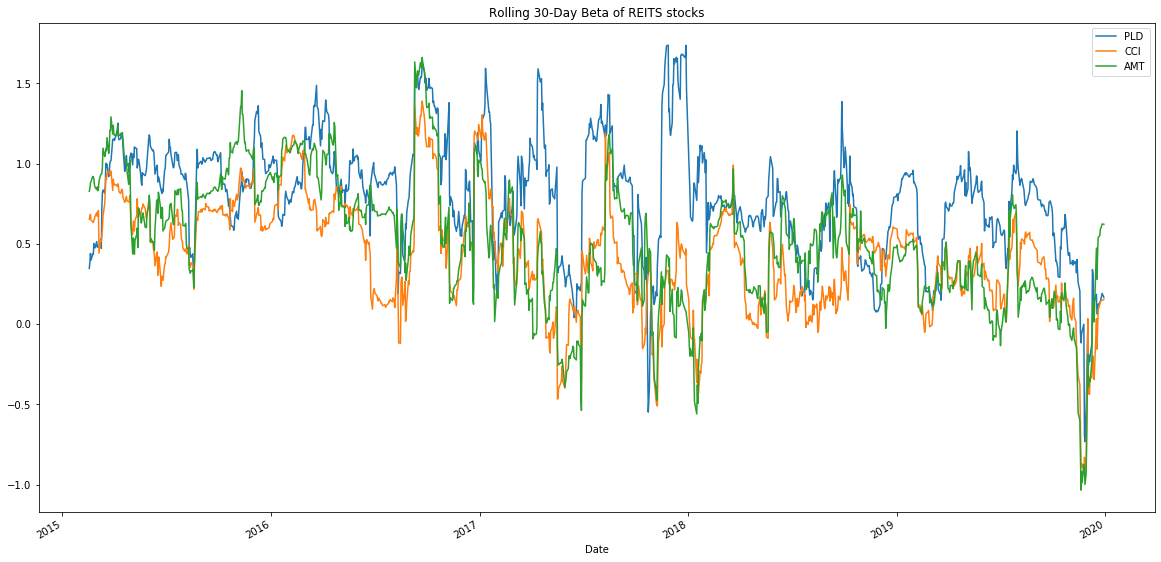

In [36]:
# Set the figure and plot the different datasets as multiple trends on the same figure
ax = rolling_pld_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of REITS stocks')
rolling_cci_beta.plot(ax=ax)
rolling_amt_beta.plot(ax=ax)


# Set the legend of the figure
ax.legend(["PLD", "CCI", "AMT"])